<a href="https://colab.research.google.com/github/MudassirABBASSi/Computer-Vision/blob/main/Emotions_detections11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the library

In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np


# Loading the dataset

In [ ]:
Train_data = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/emotion-detection-fer/train',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    interpolation='nearest',
    batch_size=32,
    shuffle=True
)

Found 28709 files belonging to 7 classes.


I0000 00:00:1761160066.011722      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [ ]:
Test_data = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/emotion-detection-fer/test',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    interpolation='nearest',
    batch_size=32,
    shuffle=False # Usually shuffle is not needed for test data
)

Found 7178 files belonging to 7 classes.


In [ ]:
class_name = Train_data.class_names
class_name

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [ ]:
len(Train_data )

898

In [ ]:
len(Test_data)

225

# Checking the Size Of Image

In [ ]:
for image_batch,label_batch in Train_data .take(1):
  print(image_batch.shape)
  print(label_batch[0].numpy())

(32, 256, 256, 3)
4


In [ ]:
for image_size,label in Train_data .take(1):
  print(image_size)

tf.Tensor(
[[[[185 185 185]
   [185 185 185]
   [185 185 185]
   ...
   [182 182 182]
   [182 182 182]
   [182 182 182]]

  [[185 185 185]
   [185 185 185]
   [185 185 185]
   ...
   [182 182 182]
   [182 182 182]
   [182 182 182]]

  [[185 185 185]
   [185 185 185]
   [185 185 185]
   ...
   [182 182 182]
   [182 182 182]
   [182 182 182]]

  ...

  [[ 37  37  37]
   [ 37  37  37]
   [ 37  37  37]
   ...
   [ 34  34  34]
   [ 34  34  34]
   [ 34  34  34]]

  [[ 37  37  37]
   [ 37  37  37]
   [ 37  37  37]
   ...
   [ 34  34  34]
   [ 34  34  34]
   [ 34  34  34]]

  [[ 37  37  37]
   [ 37  37  37]
   [ 37  37  37]
   ...
   [ 34  34  34]
   [ 34  34  34]
   [ 34  34  34]]]


 [[[ 97  97  97]
   [ 97  97  97]
   [ 97  97  97]
   ...
   [114 114 114]
   [114 114 114]
   [114 114 114]]

  [[ 97  97  97]
   [ 97  97  97]
   [ 97  97  97]
   ...
   [114 114 114]
   [114 114 114]
   [114 114 114]]

  [[ 97  97  97]
   [ 97  97  97]
   [ 97  97  97]
   ...
   [114 114 114]
   [114 114 114]


# View Image

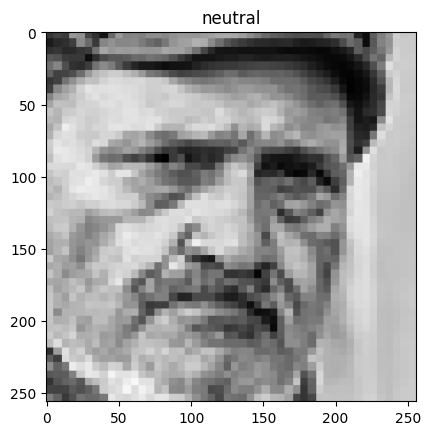

In [ ]:
for image_batch,label in Train_data .take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.title(class_name[label[0]])


# Spliting the model
test dataset will be for testing and the data veriabe converted in to train and validate data set
80% train and 20% validate

In [ ]:
len(Train_data )

898

In [ ]:
899-718

181

# train dataSet

In [ ]:
train_size = 0.8
len(Train_data )*train_size
train_ds = Train_data .take(718)

In [ ]:
len(train_ds)

718

# Test Data Set

In [ ]:
len(Test_data)

225

In [ ]:
test_ds = Test_data
len(test_ds)

225

# Validate Data Set

In [ ]:
# Correctly split validation data from the end of training data
val_ds = Train_data.skip(718)
len(val_ds)

180

In [ ]:
print(len(train_ds))
print(len(test_ds))
print(len(val_ds))

718
225
180


# Shuffling the data Set

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)  # No shuffle for test
val_ds = val_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

# Rescaling the images

In [ ]:
IMAGE_SIZE = 256
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
]
)

# Data Augmented

In [ ]:
data_augmnet = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # Only horizontal for faces
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2)

])

# CNN

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30  # Increased epochs for initial training
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 7

In [ ]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU memory growth enabled")
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# # Number of classes in your dataset
# n_classes = 7 # change this according to your dataset

# ----------------------------
# 1️⃣ Preprocessing Layers
# ----------------------------
# resize_and_rescale = tf.keras.Sequential([
#     layers.Resizing(224, 224),
#     layers.Rescaling(1./255)
# ])

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),   # Only horizontal for signs
#     layers.RandomRotation(0.15),
#     layers.RandomZoom(0.1),
#     layers.RandomContrast(0.2),
# ])

# ----------------------------
# 2️⃣ Load EfficientNetB0 Base
# ----------------------------
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model initially
base_model.trainable = False

# ----------------------------
# 3️⃣ Build Full Model
# ----------------------------
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(n_classes, activation='softmax')
])

# ----------------------------
# 4️⃣ Compile Model
# ----------------------------
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ----------------------------
# 5️⃣ Define Callbacks
# ----------------------------
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_sign_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# ----------------------------
# 6️⃣ Train the Model
# ----------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30


E0000 00:00:1761160095.338264      37 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_4_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1761160143.267470     106 cuda_dnn.cc:529] Loaded cuDNN version 90300


718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1951 - loss: 2.1944
Epoch 1: val_accuracy improved from -inf to 0.24734, saving model to best_sign_model.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 130s 91ms/step - accuracy: 0.1951 - loss: 2.1941 - val_accuracy: 0.2473 - val_loss: 2.1588 - learning_rate: 0.0010
Epoch 2/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2404 - loss: 1.8379
Epoch 2: val_accuracy did not improve from 0.24734
718/718 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.2404 - loss: 1.8379 - val_accuracy: 0.2473 - val_loss: 2.0250 - learning_rate: 0.0010
Epoch 3/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2475 - loss: 1.8270
Epoch 3: val_accuracy did not improve from 0.24734
718/718 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.2475 - loss: 1.8270 - val_accuracy: 0.2473 - val_loss: 1.9124 - learning_rate: 0.0010
Epoch 4/30
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2481 - loss: 1.8264
Epoch 4: val_accuracy did not improve fr

In [ ]:
# Unfreeze top layers of base model
base_model.trainable = True

# Optionally freeze the first few layers to avoid overfitting
for layer in base_model.layers[:-40]:
    layer.trainable = False

# Compile again with smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune for 10–20 more epochs
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/15


E0000 00:00:1761160522.797701      37 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_4_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2493 - loss: 1.8405
Epoch 1: val_accuracy did not improve from 0.24734
718/718 ━━━━━━━━━━━━━━━━━━━━ 77s 76ms/step - accuracy: 0.2493 - loss: 1.8405 - val_accuracy: 0.2473 - val_loss: 1.8148 - learning_rate: 1.0000e-05
Epoch 2/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2515 - loss: 1.8259
Epoch 2: val_accuracy did not improve from 0.24734
718/718 ━━━━━━━━━━━━━━━━━━━━ 50s 70ms/step - accuracy: 0.2515 - loss: 1.8259 - val_accuracy: 0.2473 - val_loss: 1.8154 - learning_rate: 1.0000e-05
Epoch 3/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2516 - loss: 1.8226
Epoch 3: val_accuracy did not improve from 0.24734
718/718 ━━━━━━━━━━━━━━━━━━━━ 50s 70ms/step - accuracy: 0.2516 - loss: 1.8226 - val_accuracy: 0.2473 - val_loss: 1.8114 - learning_rate: 1.0000e-05
Epoch 4/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2481 - loss: 1.8198
Epoch 4: val_accuracy did not improve from 0.24734
718/718 ━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt

# ✅ Evaluate on test dataset first
scores = model.evaluate(test_ds, verbose=1)
print("=" * 50)
print(f"✅ Test Loss: {scores[0]:.4f}")
print(f"✅ Test Accuracy: {scores[1] * 100:.2f}%")
print("=" * 50)

# ✅ Combine history from both phases (initial + fine-tuning)
acc = history.history['accuracy'] + fine_tune_history.history['accuracy']
val_acc = history.history['val_accuracy'] + fine_tune_history.history['val_accuracy']
loss = history.history['loss'] + fine_tune_history.history['loss']
val_loss = history.history['val_loss'] + fine_tune_history.history['val_loss']

# ✅ Plot Accuracy and Loss
plt.figure(figsize=(15, 5))
plt.tight_layout()

# ---- Accuracy Plot ----
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(x=len(history.history['accuracy']), color='r', linestyle='--', label='Fine-tuning Start')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# ---- Loss Plot ----
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(x=len(history.history['loss']), color='r', linestyle='--', label='Fine-tuning Start')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2216 - loss: 1.8523

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])


In [ ]:
  for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()


    plt.imshow(first_image)
    print("First image actua Label:",class_name[first_label])
    batch_pre =model.predict(image_batch)
    print(class_name[np.argmax(batch_pre[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array, verbose=0)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
import matplotlib.pyplot as plt

for images, labels in test_ds.take(1):
    plt.figure(figsize=(15, 15))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))

        pre_class,confidence = predict(model,images[i].numpy())
        actual_class = class_name[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted{pre_class},\n Confidence{confidence}")
        plt.axis('off')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions for confusion matrix
y_true = []
y_pred = []

# Save the trained model
model.save("Emotions_Detection.keras")
print("\n✅ Model saved successfully as 'Emotions_Detection.keras'")

# Generate predictions on test dataset
for images, labels in test_ds:
    predictions = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

# Print classification report
print("=" * 60)
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_name))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_name,
    yticklabels=class_name
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
